In [1]:
import pandas as pd

In [8]:
oil = pd.read_csv("../retail/oil.csv", parse_dates=['date'])
oil.dtypes

date          datetime64[ns]
dcoilwtico           float64
dtype: object

# Assignment 1: Simple Line Chart

Build a simple line plot for the oil series. Are there any interesting patterns here? 

What happened in 2014 to oil price?

In [9]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


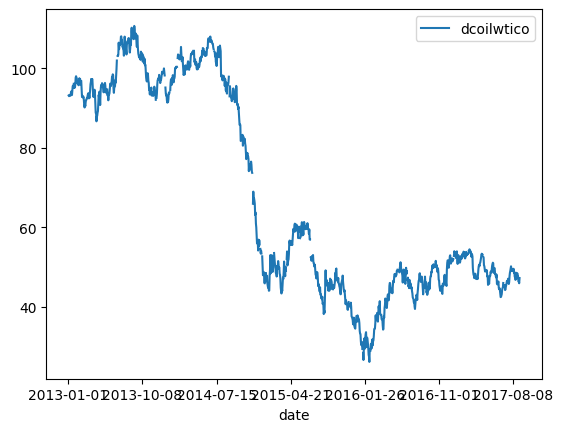

In [6]:
# plotting with 'x=column_for_x_axis' which plots all data
oil.plot(x='date');

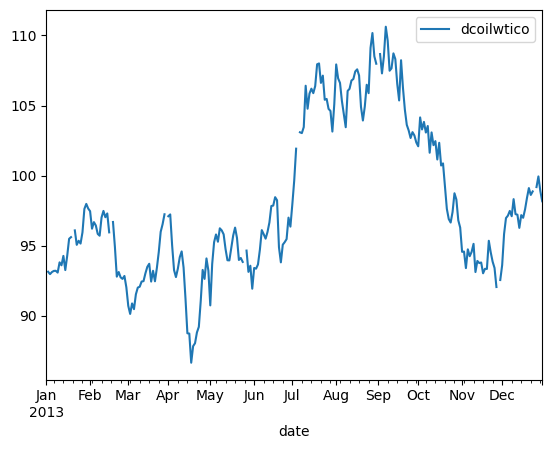

In [10]:
# plotting with set_index('column_for_x_axis)
oil.set_index('date').loc['2013'].plot();

# Assignment 2: Upgraded Line Chart


Give your chart a style, add axis titles, and change the color of the line to black. 

Consider converting the date column to datetime64.

Rename the column to a more intuitive name for the audience.

# Assignment 3: Subplots

Filter the transactions table to stores 1, 2, 3 and 4, then reshape it so each row is a date, and the columns of the table are the transactions for each store. 

Once you've done that, create a 2x2 line plot of transactions vs time, with one plot for each store.

Thanks!

In [ ]:
transactions = pd.read_csv("../retail/transactions.csv")

# Assignment 4: Bar Charts

Create a sorted Bar chart of total sales by store number for stores 1, 2, 3 and 4.

Then create a horizontal stacked bar chart of sales by month, stacked by store number. 

In [ ]:
# convert dates to datetime64

stores_1234.index = stores_1234.index.astype("datetime64[ns]") 

stores_1234

In [ ]:
# stores_1234.index.month will allow you to groupby the month! You can also slice it.


# Assignment 5: Scatterplots

Plot the relationship between store 2 and store 3 sales.

Color the dots by month.

Use `c=stores_1234.index.month` to do so.

In [ ]:
stores_1234.head()

# Assignment 6: Histograms

Hi there,

Can you plot the distributions of sales for stores 2 and 3?

I want to see how often store 2 has sales similar to store 3, as well as if there are any outlier type days.

Thanks!


In [ ]:
stores_1234.head()